# Teoria

algoritmi nearest neighbours

- famiglia di algoritmi ML non parametrici, non ci sono pesi e bias da ottimizzare. 
- Algoritmo non fa assunzione su forma distribuzione sottostante. 
- sono definiti modelli lazy perchè non apprendono da dati ma li memorizzando forzando overfitting

trova numero pred di obs più vicine al punto da classificare, **proximity search**

Dato un insieme S di pti in uno spazio M e un pto di interrogazione Q con $Q \in M$ trovare il $P \in S$ piu vicino a Q

definito anche problema dell'ufficio postale, trovare per ogni cittadino l'ufficio postale più vicino

## KNN

- algo di neighbours più popolare e utilizzato 
- classe predetta è quella che ha le k obs più vicine a quella da classificare
- k è un iperparametro
- per k grandi si riduce rumore
- per valori minori si ha decision boundary piu nette e modello più accurato

1. scelgo valore di K tramite cross validation
2. scelgo una metrica per la distanza
3. cerchiamo i k vicini più prossimi alla obs che vogliamo classificare
4. assegniamo la classe più presente tra i vicini 

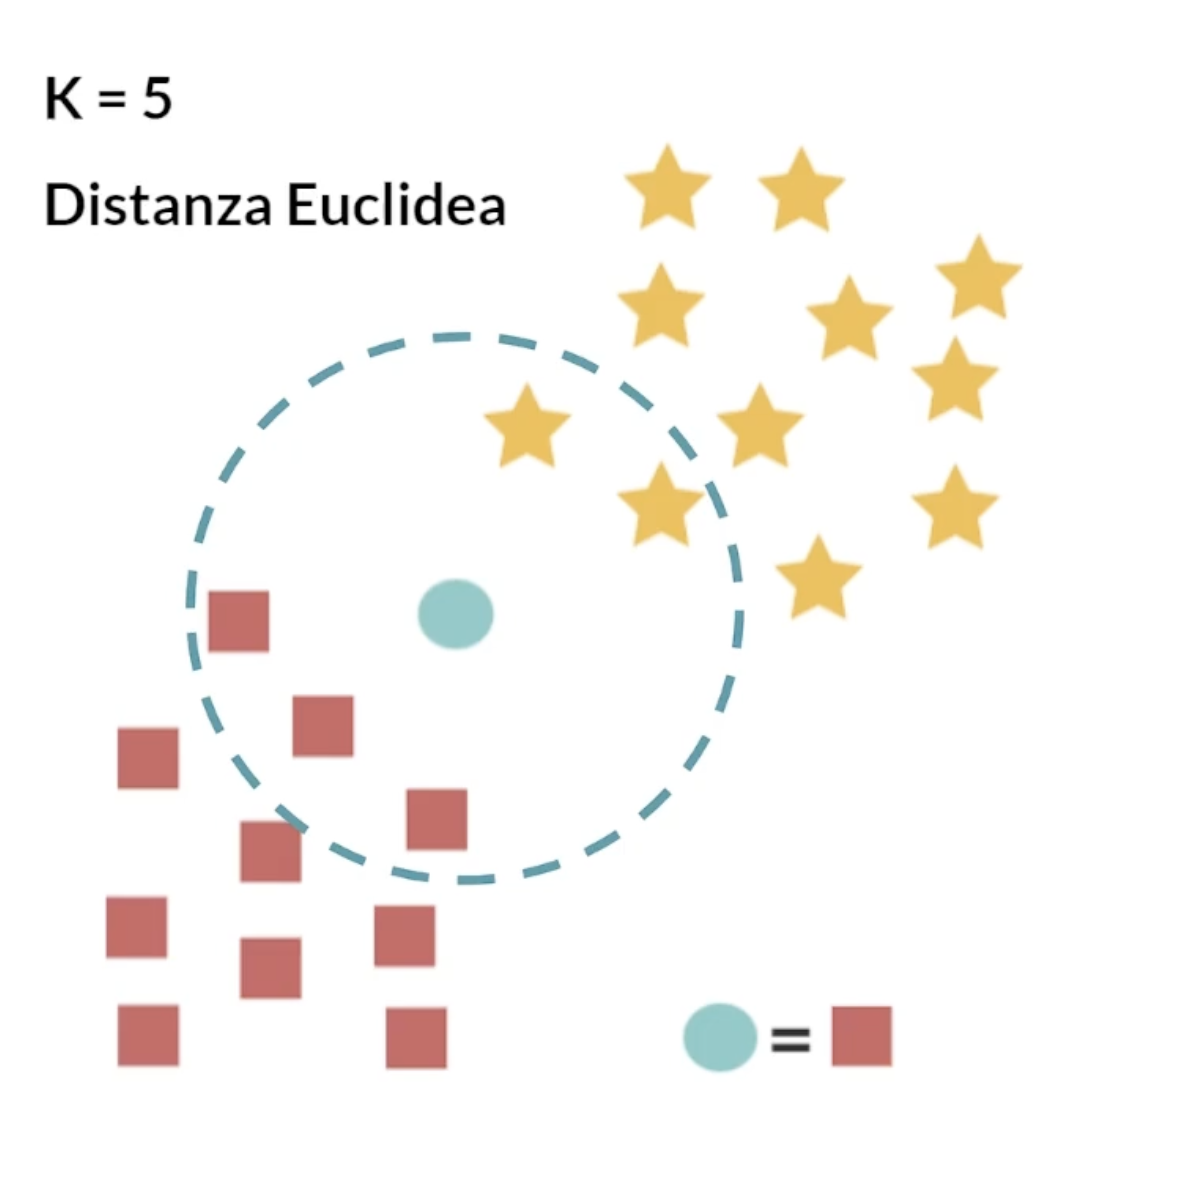

se si trova un pareggio tra classi si assegna alla classe più vicina

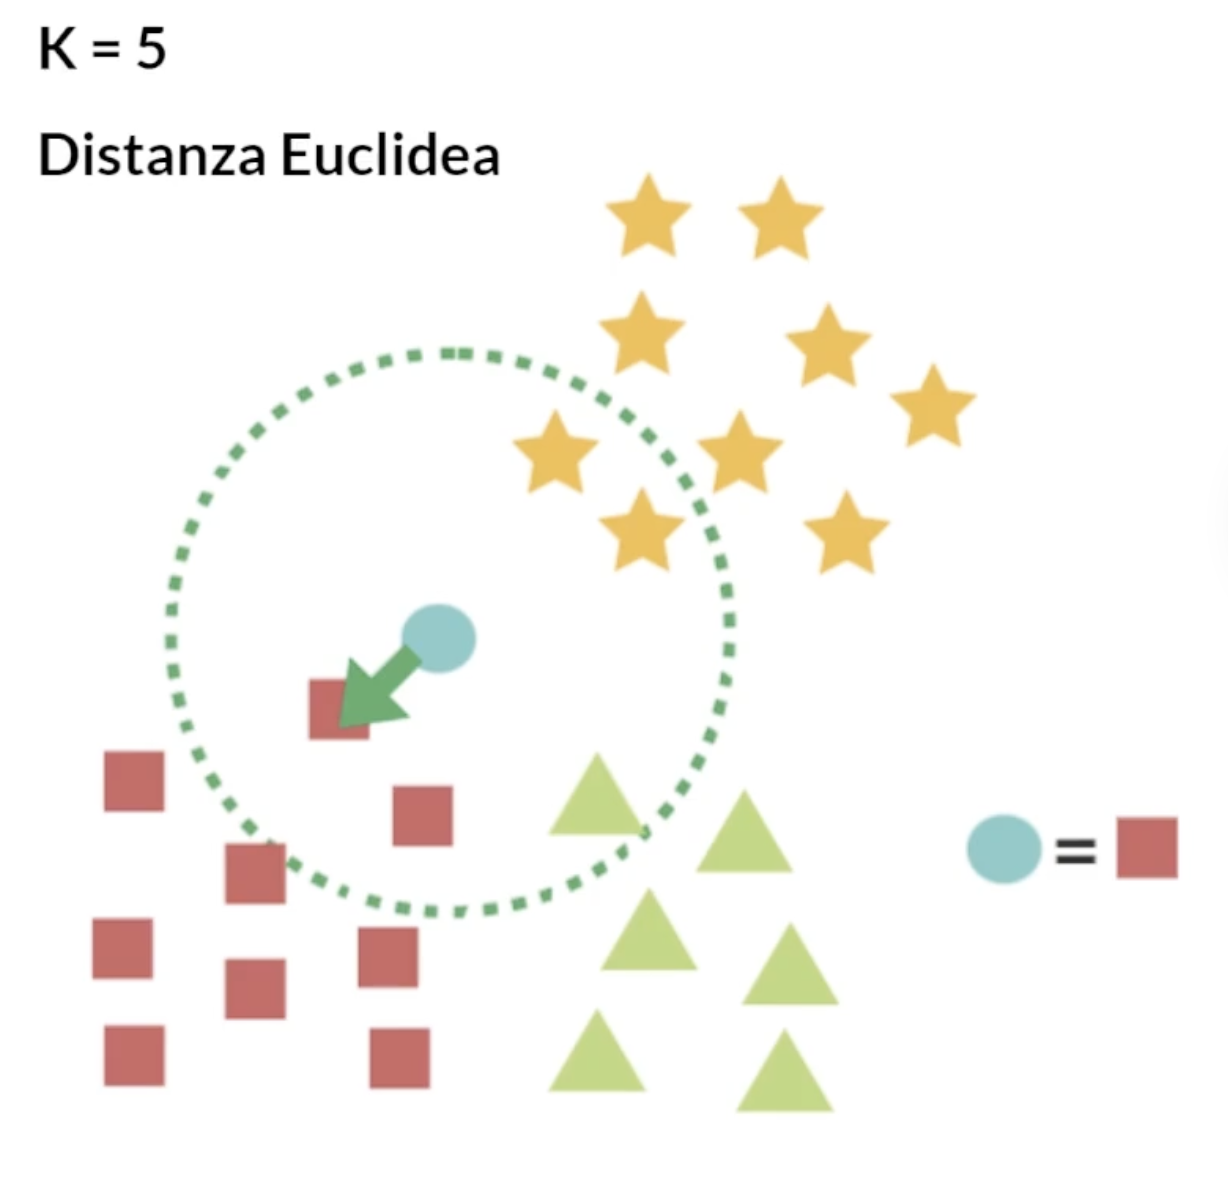

**vantaggi**
- algo semplici
- si adatta subito a nuovi dati 
- prende anche decision boundary molto irregolari

**contro**
- molto dispendioso per molti dati
- sensibile a outliar
- non interpretabile

## Metriche per le distanze

**distanza di manhattan**

$|x1-x2|+|y1-y2|$
evita che le differenze importanti siano più pesanti di quelle meno importanti, ugualmente influenzata da tutte le dimensioni

**Distanza di minkowsky**
generalizzazione di distanza euclidea $(|x1-x2|^p+|y1-y2|^p)^{\frac{1}{p}}$ posso gestire p per dare il giusto peso alle distanze tra le varie dimensioni

## Radius Nearest Neighbours RNN

- utile quando le obs sono distribuite in maniera non uniforme
- si concentra sulle regioni non sulle obs
- la classe predetta è quella maggiore contenuta nel raggio di distribuzione

raggio iperparametro tra trovare tramite CV

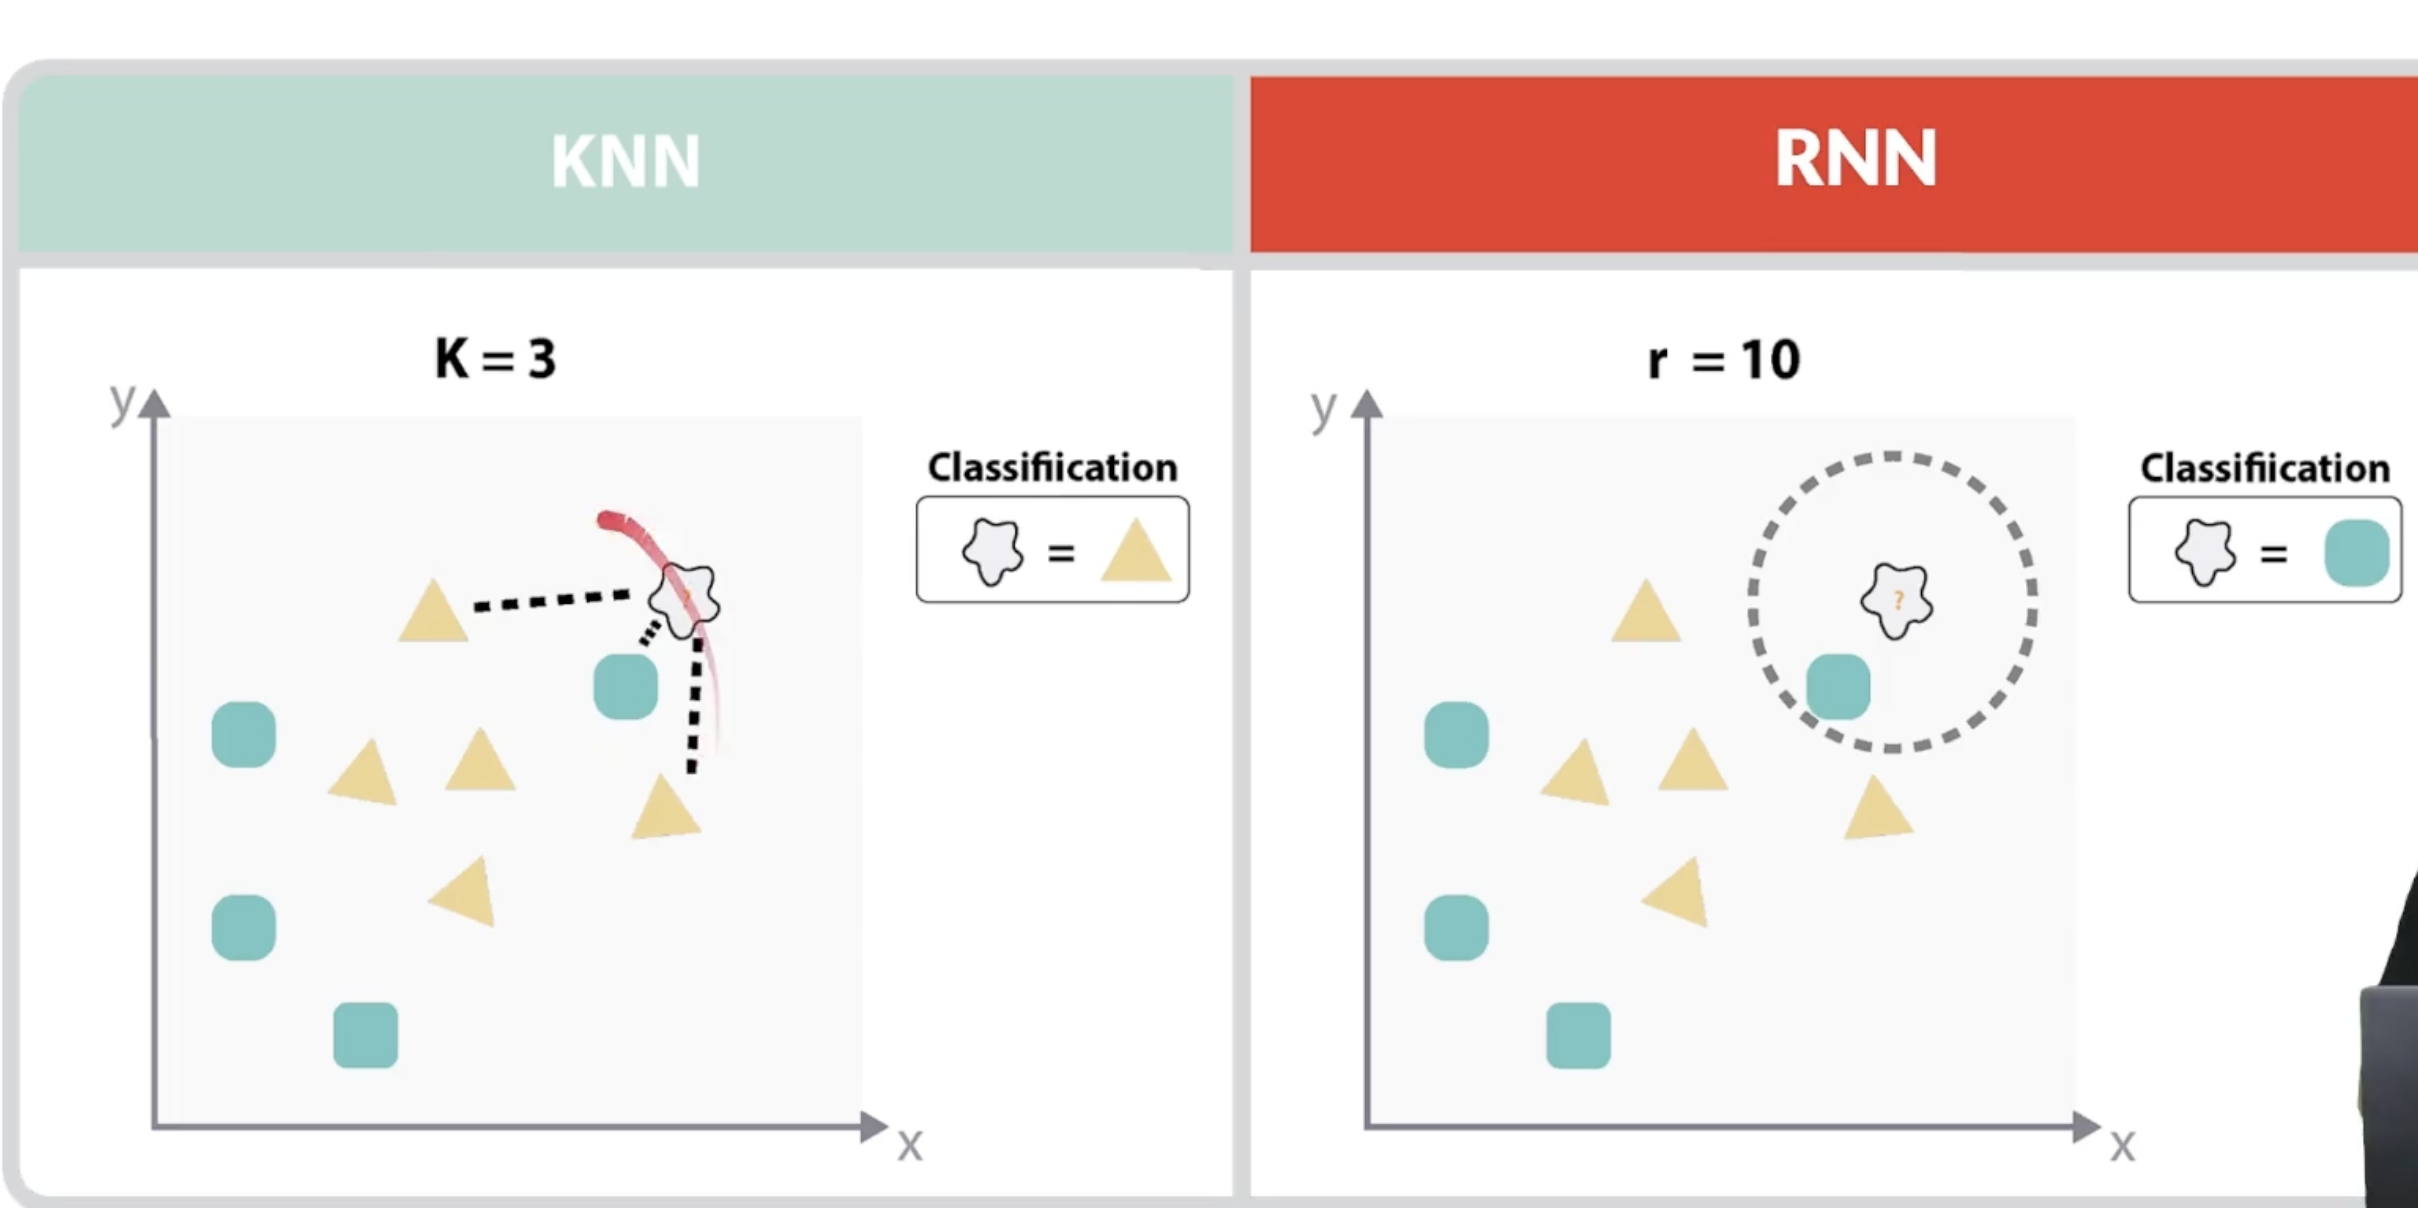

- RNN più resistente al rumore 
- KNN più preciso con buona scelta di K

# Pratica

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

In [2]:
RANDOM_SEED = 0

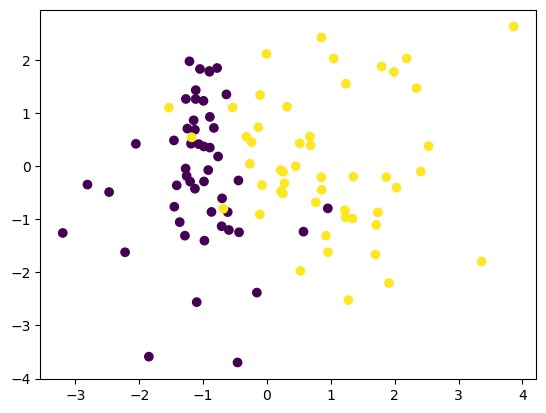

In [4]:
X, y = make_classification(
    n_samples=100, 
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2, 
    random_state=RANDOM_SEED
)

plt.scatter(X[:,0], X[:,1], c= y)

## KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier


testiamolo su diversi k

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=RANDOM_SEED)

In [ ]:
ks = [1,2,3,4,5,10,12,15,20,30,40,50]

for k in ks:

    print(f"K={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_proba_train = knn.predict_proba(X_train)

    y_pred_test = knn.predict(X_test)
    y_proba_test = knn.predict_proba(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    log_loss_train = log_loss(y_train, y_pred_train)
    log_loss_test = log_loss(y_test, y_pred_test)

    print(f"ACCURACY: TRAIN = {accuracy_train:.3f} TEST={accuracy_test:.3f}")
    print(f"LOG LOSS: TRAIN = {log_loss_train:.4f} TEST={log_loss_test:4f}")

K=1
ACCURACY: TRAIN = 1.000 TEST=0.850
LOG LOSS: TRAIN = 0.0000 TEST=5.406548
K=2
ACCURACY: TRAIN = 0.925 TEST=0.950
LOG LOSS: TRAIN = 2.7033 TEST=1.802183
K=3
ACCURACY: TRAIN = 0.938 TEST=0.950
LOG LOSS: TRAIN = 2.2527 TEST=1.802183
K=4
ACCURACY: TRAIN = 0.963 TEST=0.950
LOG LOSS: TRAIN = 1.3516 TEST=1.802183
K=5
ACCURACY: TRAIN = 0.950 TEST=0.950
LOG LOSS: TRAIN = 1.8022 TEST=1.802183
K=10
ACCURACY: TRAIN = 0.925 TEST=0.950
LOG LOSS: TRAIN = 2.7033 TEST=1.802183
K=12
ACCURACY: TRAIN = 0.887 TEST=0.950
LOG LOSS: TRAIN = 4.0549 TEST=1.802183
K=15
ACCURACY: TRAIN = 0.900 TEST=0.950
LOG LOSS: TRAIN = 3.6044 TEST=1.802183
K=20
ACCURACY: TRAIN = 0.900 TEST=0.950
LOG LOSS: TRAIN = 3.6044 TEST=1.802183
K=30
ACCURACY: TRAIN = 0.900 TEST=0.950
LOG LOSS: TRAIN = 3.6044 TEST=1.802183
K=40
ACCURACY: TRAIN = 0.850 TEST=0.950
LOG LOSS: TRAIN = 5.4065 TEST=1.802183
K=50
ACCURACY: TRAIN = 0.850 TEST=0.950
LOG LOSS: TRAIN = 5.4065 TEST=1.802183


miglior modello con k  =10

In [11]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [13]:
x = [0,0]
y_pred = knn10.predict([x])
y_pred

array([1])

visualizziamo i 10 neighbours di x

In [14]:
knn.kneighbors([x])

(array([[0.22806125, 0.27128807, 0.27212308, 0.36304814, 0.42146474,
         0.45140126, 0.51596759, 0.51944271, 0.52152733, 0.56700546,
         0.64361102, 0.7464876 , 0.78716735, 0.78768505, 0.8751657 ,
         0.87555343, 0.91410119, 0.92321994, 0.9279805 , 0.96191993,
         0.96472862, 1.02281221, 1.05209798, 1.20495805, 1.22336998,
         1.22985243, 1.23813224, 1.23972079, 1.26326636, 1.27182811,
         1.27471185, 1.29023173, 1.2989885 , 1.31862705, 1.32222062,
         1.34146977, 1.34491111, 1.35853008, 1.43494658, 1.43834581,
         1.4740426 , 1.53621939, 1.56095667, 1.60114476, 1.63955683,
         1.66236447, 1.68908641, 1.71114629, 1.7252393 , 1.79474699]]),
 array([[10, 76,  0, 68, 15, 64, 14, 30, 78, 25, 74,  9, 28, 32,  8, 39,
         51, 20, 41, 13, 45, 33, 44,  6, 75, 56, 69, 37, 34, 50, 42, 35,
         55, 71, 48,  1,  4, 31, 17, 73,  3, 27, 43, 72, 47, 46, 62, 22,
         12, 67]]))

ottengo due array, il primo ha le distanze, il secondo gli indici dei neighbors nell'array di x_Train

## Addestriamo un modello RNN

per usarlo i dati devono essere tutti normalizzati

In [15]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


In [16]:
X_train.min()

0.0

In [17]:
X_train.max()

1.0

In [19]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [23]:
Rs = [.2,.3,.4,.5,.6,.7,.8,.9,1]

for r in Rs:

    print(f"R={r}")
    rnn = RadiusNeighborsClassifier(radius=r)
    rnn.fit(X_train, y_train)

    y_pred_train = rnn.predict(X_train)
    y_proba_train = rnn.predict_proba(X_train)

    y_pred_test = rnn.predict(X_test)
    y_proba_test = rnn.predict_proba(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    log_loss_train = log_loss(y_train, y_pred_train)
    log_loss_test = log_loss(y_test, y_pred_test)

    print(f"ACCURACY: TRAIN = {accuracy_train:.3f} TEST={accuracy_test:.3f}")
    print(f"LOG LOSS: TRAIN = {log_loss_train:.4f} TEST={log_loss_test:4f}")

R=0.2
ACCURACY: TRAIN = 0.900 TEST=0.950
LOG LOSS: TRAIN = 3.6044 TEST=1.802183
R=0.3
ACCURACY: TRAIN = 0.875 TEST=0.950
LOG LOSS: TRAIN = 4.5055 TEST=1.802183
R=0.4
ACCURACY: TRAIN = 0.900 TEST=0.900
LOG LOSS: TRAIN = 3.6044 TEST=3.604365
R=0.5
ACCURACY: TRAIN = 0.875 TEST=0.850
LOG LOSS: TRAIN = 4.5055 TEST=5.406548
R=0.6
ACCURACY: TRAIN = 0.662 TEST=0.550
LOG LOSS: TRAIN = 12.1647 TEST=16.219644
R=0.7
ACCURACY: TRAIN = 0.588 TEST=0.500
LOG LOSS: TRAIN = 14.8680 TEST=18.021827
R=0.8
ACCURACY: TRAIN = 0.562 TEST=0.450
LOG LOSS: TRAIN = 15.7691 TEST=19.824009
R=0.9
ACCURACY: TRAIN = 0.562 TEST=0.350
LOG LOSS: TRAIN = 15.7691 TEST=23.428375
R=1
ACCURACY: TRAIN = 0.550 TEST=0.350
LOG LOSS: TRAIN = 16.2196 TEST=23.428375


miglior modello con R = 0.2

In [24]:
r = .2
rnn = RadiusNeighborsClassifier(radius=.2)
rnn.fit(X_train, y_train)

RadiusNeighborsClassifier(radius=0.2)

il punto x è il punto di coordinate (0,0), con il radius il punto viene assegnato alla classe 0 e non alla 1 come nel rnn

In [26]:
y_pred = rnn.predict([x])
y_pred

array([0])

## disegniamo il raggio

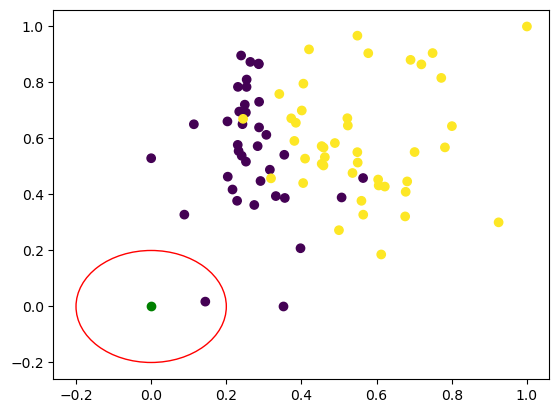

In [33]:
fig, ax = plt.subplots()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax.scatter(x[0], x[1], c='green')

cirle =plt.Circle((x[0], x[1]), r, color = 'red', fill = None)
ax.add_patch(cirle)

il punto cambia classe poiche normalizzando il dataset le obs shiftano e il punto x rimane dove sta

In [ ]:
rnn.predict_proba([x])

array([[1., 0.]])

il punto appartiene alla classe 0 al 100%

# Esercitazione

## Face Recognition
In questa esercitazione dovrai addestrare un sistema di face recognition, in grado di riconoscere 40 differenti persone. Per farlo puoi utilizzare l'Olivetti Faces Dataset scaricabile [da qui](https://github.com/ProfAI/machine-learning-modelli-e-algoritmi/raw/main/datasets/olivetti_faces.zip) e un algoritmo Nearest Neighbors, l'accuracy del modello deve essere almeno del 80%. Quale tra le 40 persone ti somiglia di più?



In [36]:
!wget https://github.com/ProfAI/machine-learning-modelli-e-algoritmi/raw/main/datasets/olivetti_faces.zip
!unzip olivetti_faces.zip

--2025-08-21 18:15:14--  https://github.com/ProfAI/machine-learning-modelli-e-algoritmi/raw/main/datasets/olivetti_faces.zip
Risoluzione di github.com (github.com)... 140.82.121.4
Connessione a github.com (github.com)|140.82.121.4|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/olivetti_faces.zip [segue]
--2025-08-21 18:15:15--  https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/olivetti_faces.zip
Risoluzione di raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connessione a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 912321 (891K) [application/zip]
Salvataggio in: «olivetti_faces.zip»

olivetti_faces.zip  100%[===================>] 890,94K  --.-

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from os import listdir
import cv2

In [55]:
RANDOM_SEED = 0
IMG_SIZE = (64,64)

In [56]:
img = cv2.imread("/Users/adanfindo/Desktop/ProAI-1/AI_developer/datasets/olivetti_faces/0/0.jpg", cv2.IMREAD_GRAYSCALE)
img.shape

(64, 64)

ritorna base, altezza e canali immagine. Dando cv2.IMREAD_GREYSCALE tolgo i canali

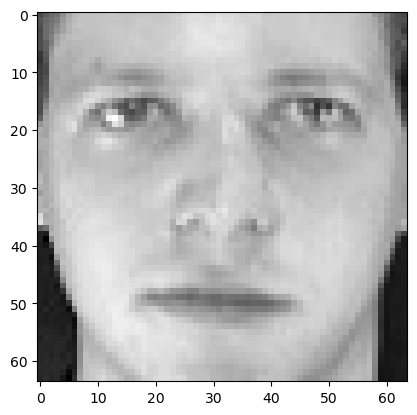

In [57]:
plt.imshow(img, cmap='gray')

leggiamo iterativamente tutte le immagini

In [58]:
FOLDER = "/Users/adanfindo/Desktop/ProAI-1/AI_developer/datasets/olivetti_faces"
X = [] #array numpy delle img
y = [] #array delle label

for d in listdir(FOLDER):
    path = FOLDER + '/' + d + '/'
    for f in listdir(path):
        if '.jpg' in f:
            x = cv2.imread(path+f, cv2.IMREAD_GRAYSCALE)
            X.append(x)
            y.append(d)

X = np.array(X)
y = np.array(y)

In [59]:
X.shape

(400, 64, 64)

In [60]:
y.shape

(400,)

flattenizziamo le matrici delle immagini

In [61]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
X.shape

(400, 4096)

4096 pixel ognuna

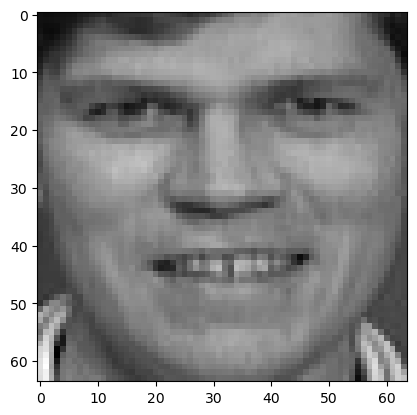

In [62]:
plt.imshow(X[0].reshape(IMG_SIZE[0], IMG_SIZE[1]), cmap='gray')

In [63]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.2, random_state=RANDOM_SEED)

In [64]:
X_train.shape

(320, 4096)

normalizziamo i dati, max di un immagine è 255


In [65]:
X_train = X_train/255
X_test = X_test/255

In [66]:
X_train.max()

1.0

per ogni elemento di y_test ci dice se è contenuto in y_train

In [68]:
(1-np.isin(y_test, y_train)).sum()

0

In [70]:
ks = [1,2,3,4,5,10,12,15,20,30,40,50]

for k in ks:

    print(f"K={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_proba_train = knn.predict_proba(X_train)

    y_pred_test = knn.predict(X_test)
    y_proba_test = knn.predict_proba(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"ACCURACY: TRAIN = {accuracy_train:.3f} TEST={accuracy_test:.3f}")

K=1
ACCURACY: TRAIN = 1.000 TEST=0.950
K=2
ACCURACY: TRAIN = 0.966 TEST=0.887
K=3
ACCURACY: TRAIN = 0.972 TEST=0.875
K=4
ACCURACY: TRAIN = 0.941 TEST=0.875
K=5
ACCURACY: TRAIN = 0.938 TEST=0.850
K=10
ACCURACY: TRAIN = 0.794 TEST=0.675
K=12
ACCURACY: TRAIN = 0.750 TEST=0.662
K=15
ACCURACY: TRAIN = 0.713 TEST=0.550
K=20
ACCURACY: TRAIN = 0.659 TEST=0.512
K=30
ACCURACY: TRAIN = 0.575 TEST=0.475
K=40
ACCURACY: TRAIN = 0.475 TEST=0.350
K=50
ACCURACY: TRAIN = 0.412 TEST=0.312


per k = 3 il valore di accuracy su train e test è simile, può essere preso per buono

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
!wget https://picresize.com/images/rsz_1284558993_10218127944384018_3386823614171543780_n.jpg

--2025-08-21 18:40:11--  https://picresize.com/images/rsz_1284558993_10218127944384018_3386823614171543780_n.jpg
Risoluzione di picresize.com (picresize.com)... 216.18.219.98
Connessione a picresize.com (picresize.com)|216.18.219.98|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 2427 (2,4K) [image/jpeg]
Salvataggio in: «rsz_1284558993_10218127944384018_3386823614171543780_n.jpg»

rsz_1284558993_1021 100%[===================>]   2,37K  --.-KB/s    in 0s      

2025-08-21 18:40:12 (34,0 MB/s) - «rsz_1284558993_10218127944384018_3386823614171543780_n.jpg» salvato [2427/2427]



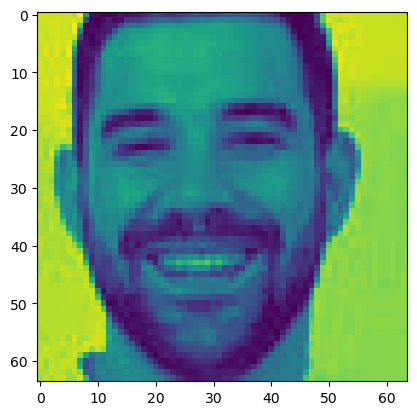

In [73]:
x = cv2.imread("/Users/adanfindo/Desktop/ProAI-1/AI_developer/rsz_1284558993_10218127944384018_3386823614171543780_n.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(x)

In [74]:
x = x.reshape(1, x.shape[0]*x.shape[1])
x.shape

(1, 4096)

In [75]:
x = x/255

In [76]:
x.max()

0.9372549019607843

In [78]:
knn.predict(x)

array(['30'], dtype='<U2')

In [84]:
y_proba = knn.predict(x)[0]

for i in range(y_proba.shape[0]):
    print(f"Person {knn.classes_[i]} = {y_proba[i]:2f}")

IndexError: tuple index out of range